# Fake news classification
# Name: Mahima Sharma
# Student id: 22225563

Mounting google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Importing required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import pickle
from wordcloud import WordCloud
import itertools
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import defaultdict
import re

Loading the csv file for fake news

In [3]:
df_fake = pd.read_csv('/content/drive/MyDrive/Datasets/ISOT_dataset/Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the unncessary columns from the dataframe

In [4]:
df_fake=df_fake.drop(['subject','date'],axis=1)
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [5]:
df_fake.text.shape

(23481,)

Assigning the fake news labels as 0

In [6]:
df_fake['label'] = 0

In [7]:
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


Loading the true news dataset

In [8]:
df_true = pd.read_csv('/content/drive/MyDrive/Datasets/ISOT_dataset/True.csv')

In [9]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Dropping the unncessary columns from the dataframe

In [10]:
df_true=df_true.drop(['subject','date'],axis=1)

In [11]:
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


Assigning the fake news labels as 1

In [12]:
df_true['label']= 1
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Concatinate both real and fake news datatset to one dataframe with its labels as 0 and 1.

In [13]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [14]:
data_train.shape

(44898, 3)

Tranforming the dataframe to one csv file to store it.

In [15]:
data_train.to_csv('fake_news.csv')

In [ ]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Reading the combined csv file in a dataframe

In [17]:
df = pd.read_csv('/content/fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
43759,43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Wi...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0
35749,35749,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,0
6810,6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1
35111,35111,WOW! MILWAUKEE SCHOOL OF ENGINEERING Professor...,Socialist indoctrination starts in Kindergarte...,0
33336,33336,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,0


Dropping the unncessary unamed column

In [18]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,title,text,label
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Wi...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0
35749,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,0
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1
35111,WOW! MILWAUKEE SCHOOL OF ENGINEERING Professor...,Socialist indoctrination starts in Kindergarte...,0
33336,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,0


Checking is any columns have null values

In [19]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [20]:
df.head()


,title,text,label
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Wi...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0
35749,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,0
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1
35111,WOW! MILWAUKEE SCHOOL OF ENGINEERING Professor...,Socialist indoctrination starts in Kindergarte...,0
33336,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,0


feature engineering

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# A. TOTAL NUMBER OF WORDS USED
df['totalwords'] = df.title.apply(lambda x: len(x.split()))

# B. TOTAL NUMBER OF UNIQUE WORDS USED
df['uniquewords'] = df.title.apply(lambda x: len(set(x.split())))

# C. TOTAL NUMBER OF CHARACTERS USED
df['totalchar'] = df.title.apply(lambda x: len(x))

# D. TOTAL SPECIAL CHARACTERS USED

df["specialchars"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)

# D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['punctuations'] = df.title.apply(lambda x: punct(x))

# E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['stopwords'] = df.title.apply(lambda x: stop(x))

# F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['titlecase'] = df.title.apply(lambda x: title(x))

## G. TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['titlecase'] = df.title.apply(lambda x: upper(x))

## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(':', 13638),
 ('’', 13531),
 ('Trump', 10844),
 (',', 9779),
 ('to', 8950),
 ('To', 7562),
 ('s', 5878),
 ('”', 5470),
 ('VIDEO', 5330),
 ('[', 5239),
 (']', 5238),
 ('in', 5031),
 ('“', 5028),
 ('The', 4576),
 ('(', 4231)]

Eradicating unnecessary words and punctuations from the text

In [22]:
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 13531),
 ('Trump', 10844),
 ('To', 7562),
 ('”', 5470),
 ('VIDEO', 5330),
 ('“', 5028),
 ('The', 4576),
 ("'s", 4153),
 ('For', 3965),
 ('In', 3566),
 ('Of', 3440),
 ('‘', 3438),
 ('A', 3082),
 ('Video', 2986),
 ('U.S.', 2907)]

In [23]:
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS
frequent_word = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in frequent_word]))
df['frequentwords'] = df.title.apply(lambda x: freq(x))

In [24]:
df.head()

,title,text,label,totalwords,uniquewords,totalchar,specialchars,punctuations,stopwords,titlecase,frequentwords
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Wi...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0,15,15,92,22,0,1,2,4
35749,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,0,15,15,82,16,0,0,9,5
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1,10,10,69,13,0,0,0,3
35111,WOW! MILWAUKEE SCHOOL OF ENGINEERING Professor...,Socialist indoctrination starts in Kindergarte...,0,24,22,168,27,0,0,6,6
33336,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,0,18,16,134,19,0,0,2,6


In [25]:
## J. AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avgof_freqword']= df.title.apply(lambda x: freq(x))

In [26]:
df.head()


,title,text,label,totalwords,uniquewords,totalchar,specialchars,punctuations,stopwords,titlecase,frequentwords,avgof_freqword
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Wi...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0,15,15,92,22,0,1,2,4,0.266667
35749,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,0,15,15,82,16,0,0,9,5,0.333333
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1,10,10,69,13,0,0,0,3,0.300000
35111,WOW! MILWAUKEE SCHOOL OF ENGINEERING Professor...,Socialist indoctrination starts in Kindergarte...,0,24,22,168,27,0,0,6,6,0.250000
33336,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,0,18,16,134,19,0,0,2,6,0.333333


Exploratory Data Analysis

In [28]:
df_fake = df[df['label']==0]
df_true = df[df['label']==1]

Text(0.5, 1.0, 'Distribution of characters used in fake news')

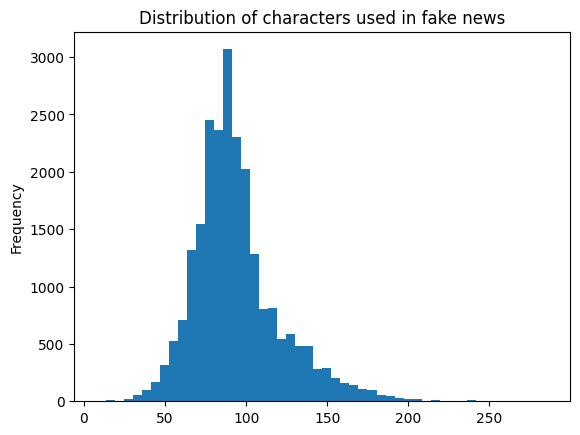

In [29]:
df_fake['totalchar'].plot(bins=50, kind='hist')
plt.title("Distribution of characters used in fake news")

In [30]:
df_fake['totalchar'].describe()

count    23481.000000
mean        94.198032
std         27.184433
min          8.000000
25%         77.000000
50%         90.000000
75%        105.000000
max        286.000000
Name: totalchar, dtype: float64

Text(0.5, 1.0, 'Distribution of characters used in true news')

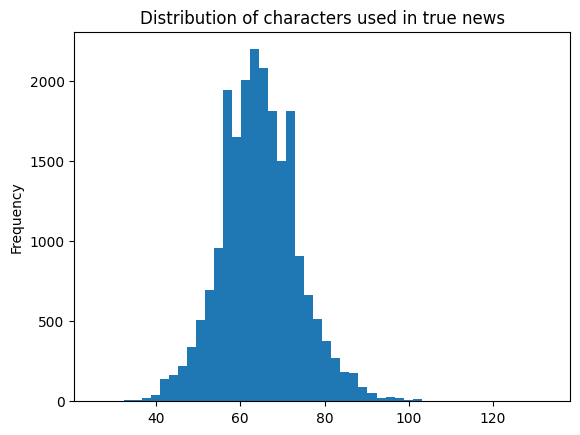

In [31]:
df_true['totalchar'].plot(bins=50, kind='hist')
plt.title("Distribution of characters used in true news")

In [32]:
df_true['totalchar'].describe()

count    21417.000000
mean        64.667881
std          9.168999
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: totalchar, dtype: float64

As we can see from the data above, false news typically uses superfluous language with additional characters to attract attention, whereas legitimate news typically uses roughly 64 characters on average for each phrase.

Text(0.5, 1.0, 'Distribution of unique words used in fake news')

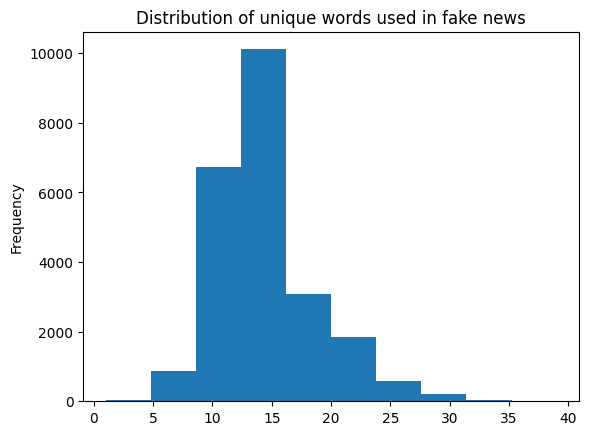

In [ ]:
df_fake['uniquewords'].plot(bins=10, kind='hist')
plt.title("Distribution of unique words used in fake news")

In [ ]:
df_fake['uniquewords'].describe()

count    23481.000000
mean        14.490609
std          4.129960
min          1.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         39.000000
Name: nbuniquewords, dtype: float64

Text(0.5, 1.0, 'Distribution of unique words in true news')

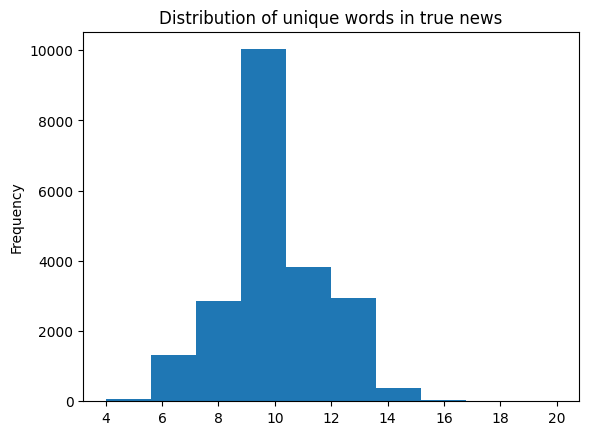

In [ ]:
df_true['uniquewords'].plot(bins=10, kind='hist')
plt.title("Distribution of unique words in true news")

In [ ]:
df_true['nbuniquewords'].describe()

count    21417.000000
mean         9.876827
std          1.656130
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         20.000000
Name: nbuniquewords, dtype: float64

As we can observe, actual headlines often have fewer unique terms than do false news headlines.

<ipython-input-33-9f5b915c6ef4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true['specialchars'])


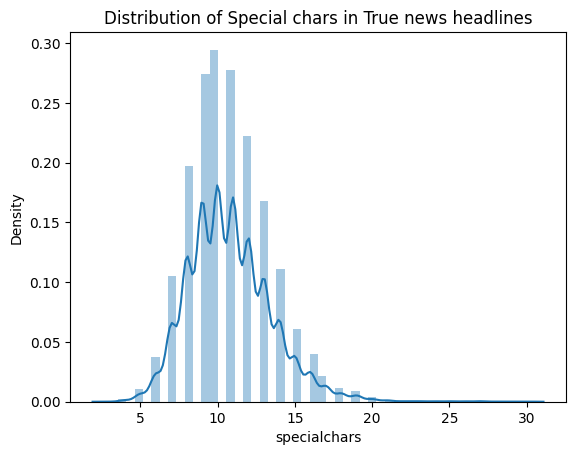

In [33]:
# distribution of  special characters in Real news Headline
sns.distplot(df_true['specialchars'])
plt.title("Distribution of Special chars in True news headlines")
plt.show()

<ipython-input-34-4cd92b251710>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fake['specialchars'])


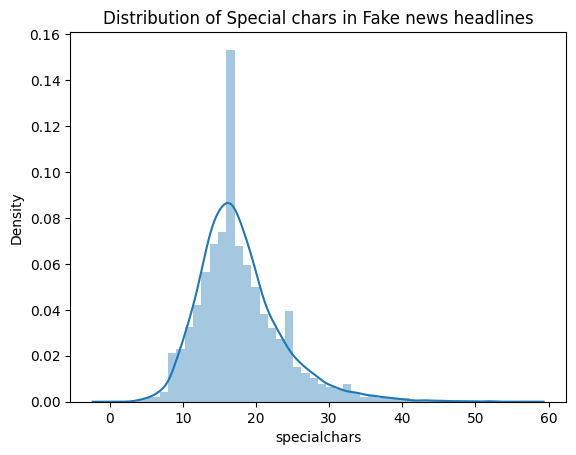

In [34]:
# distribution of  special characters in Fake news Headline
sns.distplot(df_fake['specialchars'])
plt.title("Distribution of Special chars in Fake news headlines")
plt.show()

It can be observed, false news frequently uses more special characters than actual news since real news is typically more concise and uses less superfluous words and special characters.

In [35]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

Plotting Wordcloud

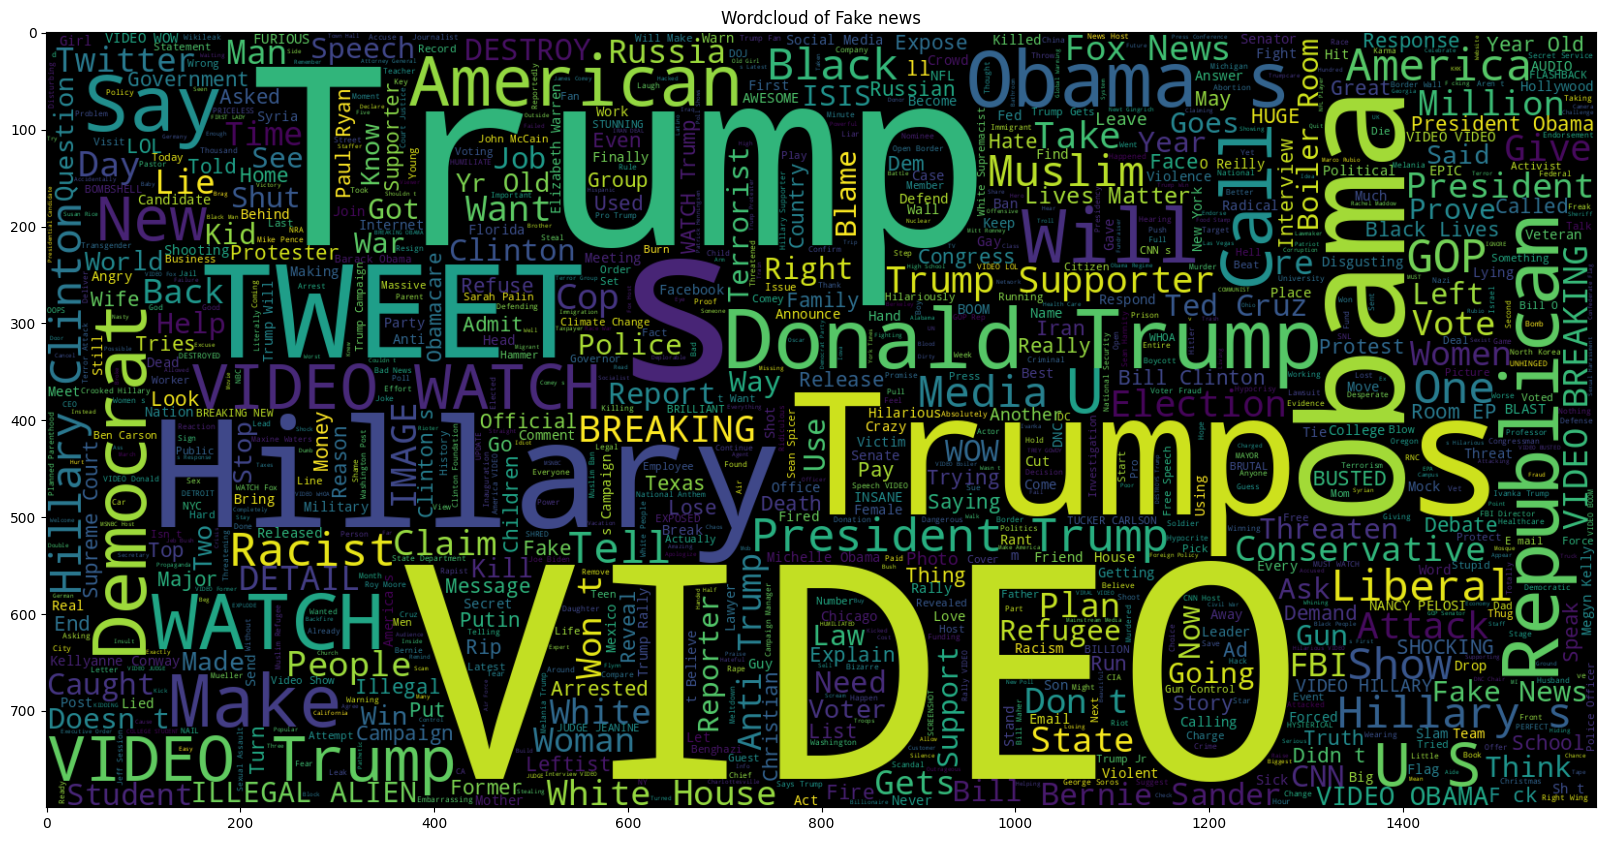

In [36]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_fake.title))
plt.title("Wordcloud of Fake news")
plt.imshow(wc , interpolation = 'bilinear')

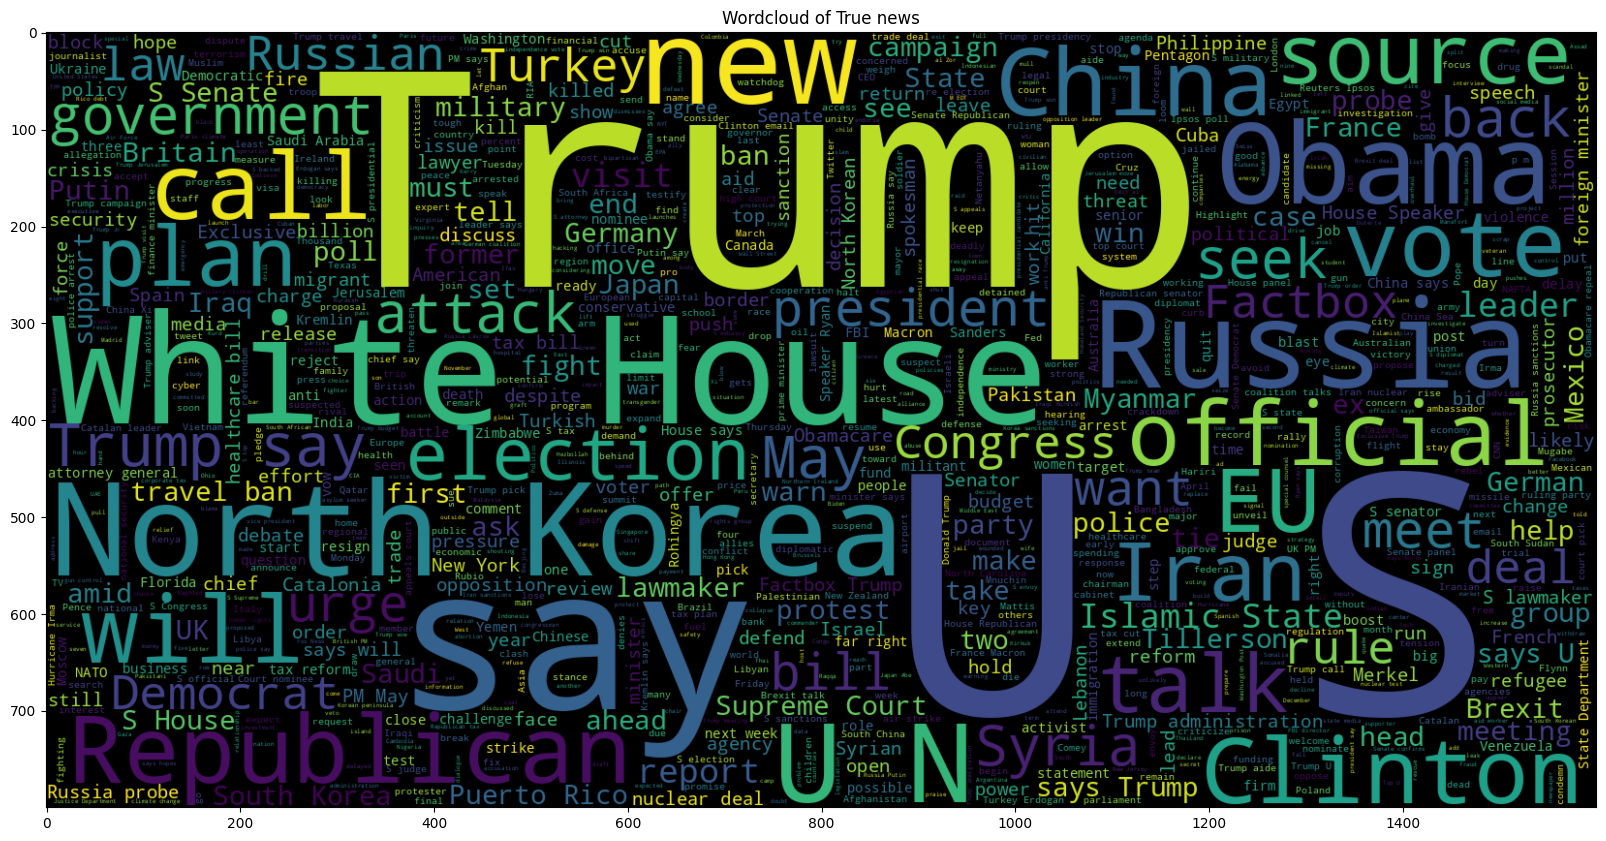

In [37]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_true.title))
plt.title("Wordcloud of True news")
plt.imshow(wc , interpolation = 'bilinear')

In [38]:
df

,title,text,label,totalwords,uniquewords,totalchar,specialchars,punctuations,stopwords,titlecase,frequentwords,avgof_freqword
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Te...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0,15,15,92,22,0,1,2,4,0.266667
35749,WANT SAVE AMERICA HILLARY? Share VIDEO Everyon...,WATCH: Even her friends on the Left appear to ...,0,15,15,82,16,0,0,9,5,0.333333
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1,10,10,69,13,0,0,0,3,0.300000
35111,WOW! MILWAUKEE SCHOOL ENGINEERING Professor Ex...,Socialist indoctrination starts in Kindergarte...,0,24,22,168,27,0,0,6,6,0.250000
33336,OOPS! UKRAINE Caught Colluding Democrats Help ...,Donald Trump wasn t the only presidential cand...,0,18,16,134,19,0,0,2,6,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
41543,BUSTED: HILLARY’S MEDIA CHEERLEADERS Caught Hi...,Wow! This compilation of blatant blocking for ...,0,16,16,121,19,0,0,5,1,0.062500
17272,U.S. takes aim Yemeni Islamic State first time,DUBAI (Reuters) - The United States said it la...,1,10,10,53,11,0,2,1,2,0.200000
28122,Caitlyn Jenner’s Friends Call Hypocrisy Face S...,When choosing a candidate for president it s p...,0,15,14,92,18,0,0,1,5,0.333333
35984,OBAMA THROWS HILLARY BUS: E-mail Scandal Got R...,Obama decides to throw Hillary under the bus I...,0,15,15,91,16,0,0,6,6,0.400000


In [39]:
df.shape

(44898, 12)

Dropping the features to prerpare dataframe for inputs to LSTM model

In [42]:
df1 = df.drop(['totalwords','uniquewords','totalchar','specialchars','punctuations','stopwords','titlecase','frequentwords','avgof_freqword'], axis=1)

In [ ]:
df1.shape

In [44]:
df1.head()

,title,text,label
43759,Episode #162 – SUNDAY WIRE: ‘The Revolution Te...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,0
35749,WANT SAVE AMERICA HILLARY? Share VIDEO Everyon...,WATCH: Even her friends on the Left appear to ...,0
6810,Bolton says Trump moves could signal 'differen...,WASHINGTON (Reuters) - One of Donald Trump’s p...,1
35111,WOW! MILWAUKEE SCHOOL ENGINEERING Professor Ex...,Socialist indoctrination starts in Kindergarte...,0
33336,OOPS! UKRAINE Caught Colluding Democrats Help ...,Donald Trump wasn t the only presidential cand...,0


In [45]:
X=df.title
X.shape

(44898,)

In [46]:
Y=df.label
Y.shape

(44898,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [48]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

Passive Agressive Classifier

In [49]:
PAC=PassiveAggressiveClassifier(max_iter=1000)
ab = PAC.fit(tfidf_train,y_train)
y_pred=PAC.predict(tfidf_test)

In [ ]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.32%


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=['FAKE','TRUE']))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      4625
        TRUE       0.94      0.94      0.94      4355

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix_PAC = confusion_matrix(y_test,y_pred, labels=[0,1])
confusion_matrix_PAC

array([[4370,  255],
       [ 277, 4078]])

In [52]:
cm_display_PAC = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_PAC, display_labels = ['FAKE', 'TRUE'])

In [53]:
import matplotlib.pyplot as plt

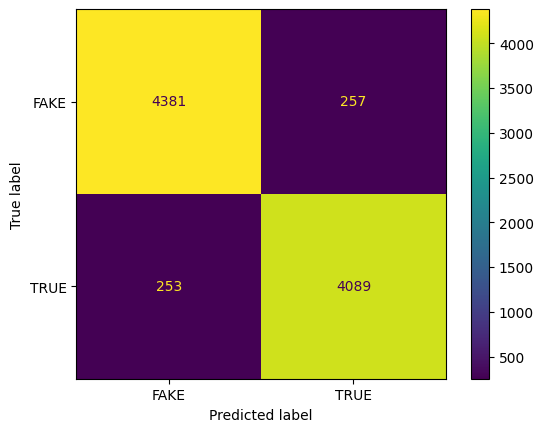

In [ ]:
cm_display_PAC.plot()
plt.show()

Multinomial Niave Bayyes Classifier

In [ ]:
MultNB = MultinomialNB()
bc = MultNB.fit(tfidf_train,y_train)
MultNB_pred=MultNB.predict(tfidf_test)

In [ ]:
score1=accuracy_score(y_test,MultNB_pred)
print(f'Multinomial Niave Bayyes Accuracy: {round(score1*100,2)}%')

Multinomial Niave Bayyes Accuracy: 93.69%


In [ ]:
print(classification_report(y_test,MultNB_pred, target_names=['FAKE','TRUE']))

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94      4638
        TRUE       0.95      0.92      0.93      4342

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
confusion_matrix(y_test,MultNB_pred, labels=[0,1])

array([[4415,  223],
       [ 344, 3998]])

In [ ]:
confusion_matrix_MB = confusion_matrix(y_test, MultNB_pred, labels=[0,1])
confusion_matrix_MB

array([[4415,  223],
       [ 344, 3998]])

In [ ]:
cm_display_MB = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_MB, display_labels = ['FAKE', 'TRUE'])

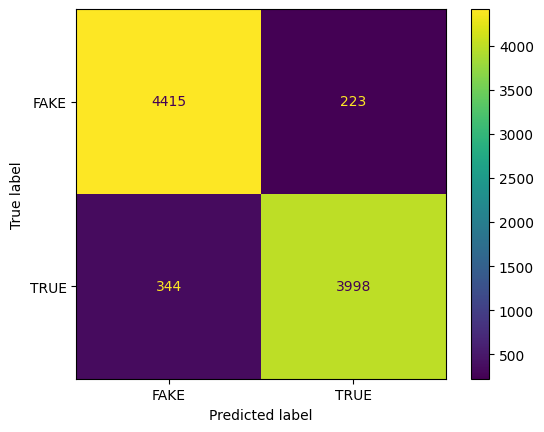

In [ ]:
cm_display_MB.plot()
plt.show()

Random Forest

In [ ]:
rfc=RandomForestClassifier(n_estimators= 10, random_state= 7)
rf = rfc.fit(tfidf_train,y_train)
rfc_pred = rfc.predict(tfidf_test)

In [ ]:
score2=accuracy_score(y_test,rfc_pred)
print(f'Random Forest Accuracy: {round(score2*100,2)}%')

Random Forest Accuracy: 93.31%


In [ ]:
print(classification_report(y_test,rfc_pred, target_names=['FAKE','TRUE']))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.93      4638
        TRUE       0.93      0.94      0.93      4342

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
confusion_matrix_RF = confusion_matrix(y_test, rfc_pred, labels=[0,1])
confusion_matrix_RF

array([[4309,  329],
       [ 272, 4070]])

In [ ]:
cm_display_RF = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF, display_labels = ['FAKE', 'TRUE'])

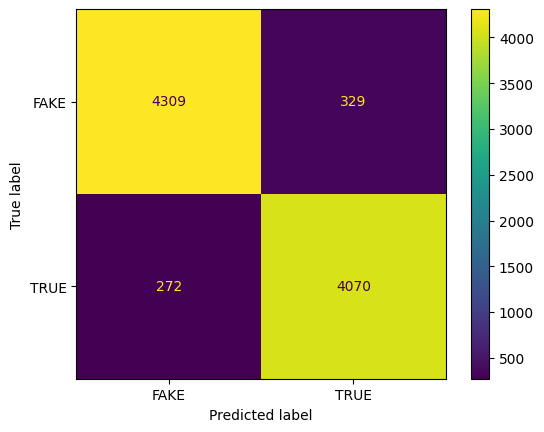

In [ ]:
cm_display_RF.plot()
plt.show()

Ensemble Learning

In [ ]:
try:
    filename = 'finalized_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(tfidf_test, y_test)
    print(f'Ensemble Learning Accuracy: {round(result*100,2)}%')
except:
    Ensemb = VotingClassifier( estimators = [('PAC',PAC),('MultNB',MultNB),('rfc',rfc)], voting = 'hard')
    ens = Ensemb.fit(tfidf_train,y_train)
    Ensemb_pred=Ensemb.predict(tfidf_test)
    filename = 'finalized_model.sav'
    pickle.dump(Ensemb, open(filename, 'wb'))
    score4=accuracy_score(y_test,Ensemb_pred)
    print(f'Ensemble Learning Accuracy: {round(score4*100,2)}%')

Ensemble Learning Accuracy: 95.42%


In [ ]:
print(classification_report(y_test,Ensemb_pred, target_names=['FAKE','TRUE']))

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.96      4638
        TRUE       0.96      0.95      0.95      4342

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [ ]:
confusion_matrix_EL = confusion_matrix(y_test, Ensemb_pred, labels=[0,1])
confusion_matrix_EL

array([[4448,  190],
       [ 221, 4121]])

In [ ]:
cm_display_EL = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_EL, display_labels = ['FAKE', 'TRUE'])

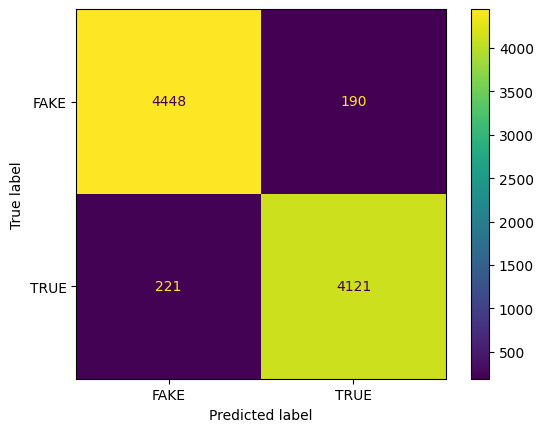

In [ ]:
cm_display_EL.plot()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.12.0


In [ ]:
df.head()

,title,text,label,nbwords,nbuniquewords,nbchar,nbspecial,nbpunct,nbstopwords,nbtitlecase,nbfreqwords,avgfreqword
11242,"Republican state, Obama talks worried American...","OMAHA, Neb. (Reuters) - President Barack Obama...",1,9,9,58,9,0,1,0,3,0.333333
27792,Proof Rick Scott’s Policies Completely F*cking...,"In 2015, Florida s government almost shut down...",0,13,13,92,18,0,0,1,2,0.153846
39711,GOP Rep Dave Brat HUMILIATES MSNBC Host Craig ...,Republican Congressman David Brat wasn t sitti...,0,20,19,127,22,0,0,4,5,0.250000
36699,BRILLIANT: [VIDEO] SHERIFF CLARKE EXPLAINS #Bl...,Nothing like a good dose of Sheriff Clarke to ...,0,13,13,105,17,0,0,11,1,0.076923
33245,WOW! CHUCK TODD Goes Nasty Chuck Schumer: Oppo...,https://www.youtube.com/watch?v=EOr9fwoc_mo,0,16,16,109,21,0,0,3,3,0.187500


In [ ]:
df_lstm = pd.read_csv('/content/fake_news.csv')
df_lstm.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
df_lstm.shape

(44898, 4)

In [ ]:
df_lstm.drop(['Unnamed: 0'],axis=1, inplace=True)
df_lstm.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
df_lstm.shape

(44898, 3)

In [ ]:
df_lstm['title_text'] = df_lstm['title'] + ' ' + df_lstm['text']
df_lstm.drop(['title', 'text'], axis=1, inplace=True)

In [ ]:
X = df_lstm['title_text']
y = df_lstm['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
## tokenizer = Tokenizer(num_words=max_vocab)
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding=padding_type, truncating=trunc_type, maxlen=max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1078/1078 [==============================] - 740s 677ms/step - loss: 0.1675 - accuracy: 0.9156 - val_loss: 0.0129 - val_accuracy: 0.9975
Epoch 2/10
1078/1078 [==============================] - 643s 597ms/step - loss: 0.0077 - accuracy: 0.9989 - val_loss: 0.0283 - val_accuracy: 0.9947
Epoch 3/10
1078/1078 [==============================] - 642s 595ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0173 - val_accuracy: 0.9969


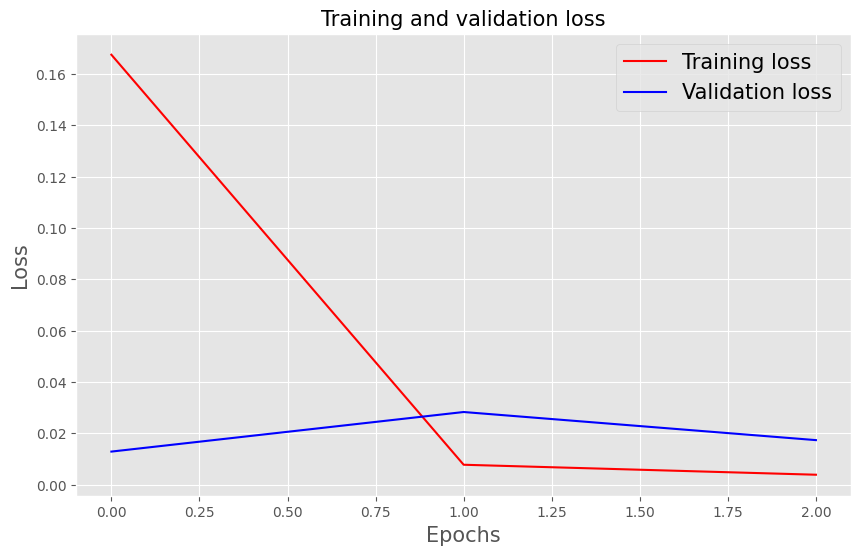

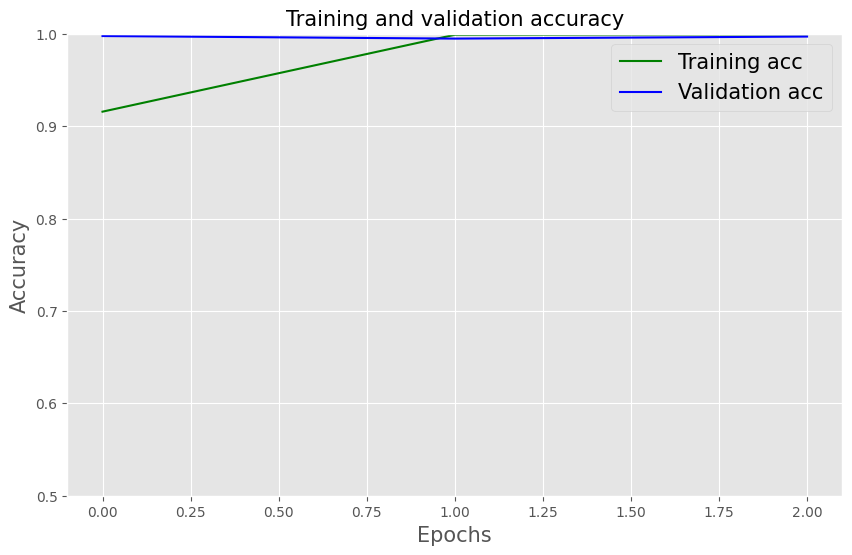

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 40s 144ms/step - loss: 0.0103 - accuracy: 0.9976


[0.010256645269691944, 0.9975501298904419]

In [ ]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

281/281 [==============================] - 38s 126ms/step


In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9975501113585746
Precision on testing set: 0.9974477958236659
Recall on testing set: 0.9974477958236659


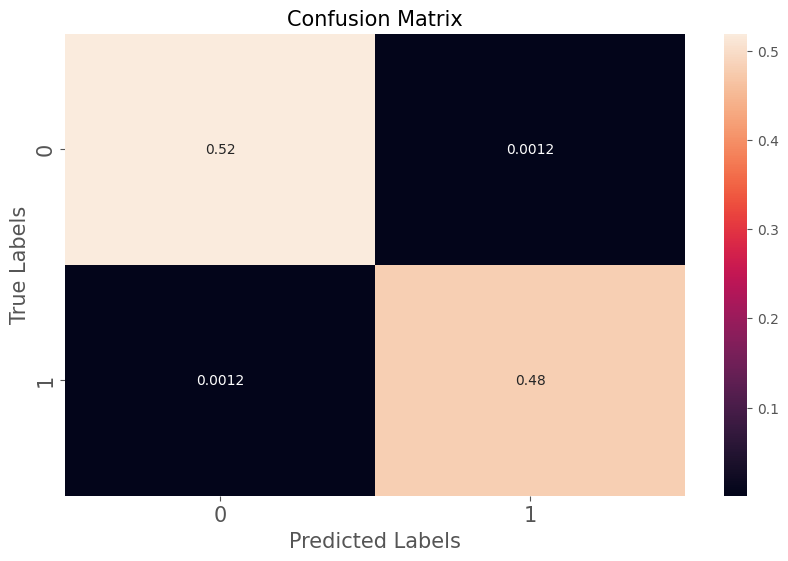

In [ ]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

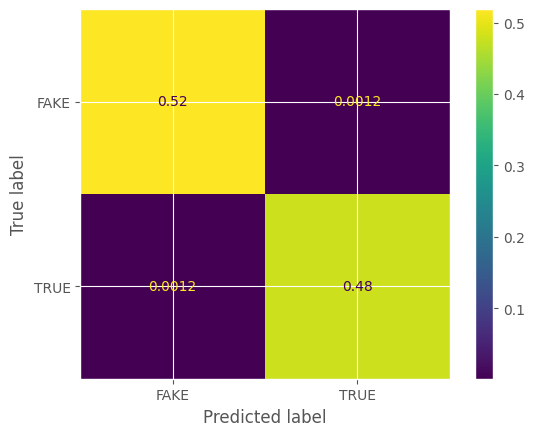

In [ ]:
cm_display_LSTM = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['FAKE', 'TRUE'])
cm_display_LSTM.plot()
plt.show()

In [ ]:
cm_display_LSTM